In [132]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [133]:
omega_1 = 4*np.pi
omega_2 = np.pi 
omega_3 = np.pi/2
R_1 = 2
R_2 = 7 
R_3 = 10
S_1 = omega_1*R_1**2
S_2 = omega_2*R_2**2
S_3 = omega_3*R_3**2
V = 15*30*4
B_1000 = V/20
octave = np.array([63, 125, 250, 500, 1000, 2000, 4000, 8000], dtype=np.int64)
mu = np.array([0.5, 0.5, 0.55, 0.7, 1, 1.6, 3, 6])
L_w1 = np.array([80, 84, 83, 87, 84, 82, 94, 96], dtype=np.float64)
L_w2 = np.array([83, 87, 85, 85, 85, 82, 83, 83],dtype=np.float64)
L_w3 = np.array([78, 81, 83, 85, 85, 86, 89, 85], dtype=np.float64)

In [134]:
d = {}
for i, oct in enumerate(map(str, octave)):
    d[oct] = [L_w1[i], L_w2[i], L_w3[i], mu[i], B_1000*mu[i]]
df = pd.DataFrame(d, ["L_w1", 'L_w2', 'L_w3', 'mu_i', 'B_i'])
df


,63,125,250,500,1000,2000,4000,8000
L_w1,80.0,84.0,83.00,87.0,84.0,82.0,94.0,96.0
L_w2,83.0,87.0,85.00,85.0,85.0,82.0,83.0,83.0
L_w3,78.0,81.0,83.00,85.0,85.0,86.0,89.0,85.0
mu_i,0.5,0.5,0.55,0.7,1.0,1.6,3.0,6.0
B_i,45.0,45.0,49.50,63.0,90.0,144.0,270.0,540.0


In [135]:
L_1 = []
L_2 = []
L_3 = []
L_sum = []
for oct in map(str, octave):
    L_1.append(df[oct].L_w1+10*np.log10(1/S_1+4/df[oct].B_i))
    L_2.append(df[oct].L_w2+10*np.log10(1/S_2+4/df[oct].B_i))
    L_3.append(df[oct].L_w3+10*np.log10(1/S_3+4/df[oct].B_i))
    L_sum.append(10*np.log10(10**(L_1[-1]/10)+10**(L_2[-1]/10)+10**(L_3[-1]/10)))
L_1 = np.array(L_1, dtype=np.float64)
L_2 = np.array(L_2, dtype=np.float64)
L_3 = np.array(L_3, dtype=np.float64)
L_sum = np.array(L_sum, dtype=np.float64)
sec_d = {}
L_norm = np.array([90, 82, 77, 73, 70, 68, 66, 64], dtype=np.float64)
for i, oct in enumerate(map(str, octave)):
    sec_d[oct] = [L_1[i], L_2[i], L_3[i], L_sum[i], L_norm[i], L_sum[i]-L_norm[i]]
sec_df = pd.DataFrame(sec_d, ['L_1', 'L_2', 'L_3', 'L_sum', 'L_norm', 'L_delta'])
df = pd.concat([df, sec_df])
print(f"Omega_1 = {omega_1}, Omega_2 = {omega_2}, Omega_3 = {omega_3}")
print(f"S_1 = {S_1}, S_2 = {S_2}, S_3 = {S_3}")
print(f"B_1000 = {B_1000}")
df

Omega_1 = 12.566370614359172, Omega_2 = 3.141592653589793, Omega_3 = 1.5707963267948966
S_1 = 50.26548245743669, S_2 = 153.93804002589985, S_3 = 157.07963267948966
B_1000 = 90.0


,63,125,250,500,1000,2000,4000,8000
L_w1,80.000000,84.000000,83.000000,87.000000,84.000000,82.000000,94.000000,96.000000
L_w2,83.000000,87.000000,85.000000,85.000000,85.000000,82.000000,83.000000,83.000000
L_w3,78.000000,81.000000,83.000000,85.000000,85.000000,86.000000,89.000000,85.000000
mu_i,0.500000,0.500000,0.550000,0.700000,1.000000,1.600000,3.000000,6.000000
B_i,45.000000,45.000000,49.500000,63.000000,90.000000,144.000000,270.000000,540.000000
L_1,70.365621,74.365621,73.030400,76.210954,72.084730,68.782647,79.404444,80.361909
L_2,72.794801,76.794801,74.410351,73.450247,72.070638,67.349635,66.286025,64.431250
L_3,67.788882,70.788882,72.403884,73.442178,72.059547,71.333141,72.259467,66.390476
L_sum,75.553403,79.401317,78.135433,79.345769,76.842863,74.245637,80.344772,80.637837
L_norm,90.000000,82.000000,77.000000,73.000000,70.000000,68.000000,66.000000,64.000000


In [136]:
def save_plot(x,y, name, labels):
    plt.figure(figsize=(10, 7))
    plt.plot(
        x,y, linestyle='-', 
        label=labels
    )
    plt.xlabel('Гц')
    plt.ylabel('дБ')
    plt.legend()
    plt.savefig(f"{name}.png")

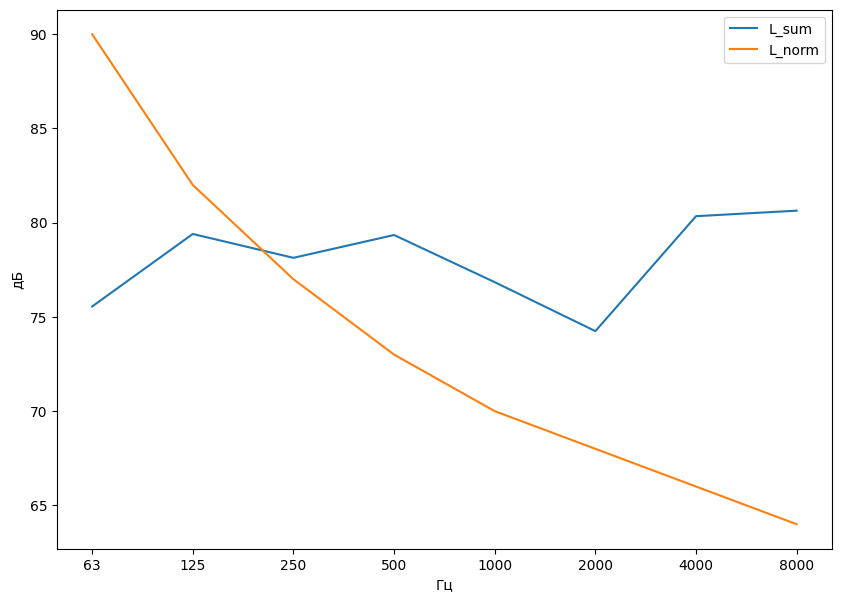

In [137]:
save_plot(list(map(str, octave)), np.array([L_sum, L_norm]).T, "grafic", ['L_sum', 'L_norm'])